In [42]:
#IMPORTAZIONE DELLE LIBRERIE
import pandas as pd #PER STRUTTURE DATI E MANIPOLAZIONE (DF/SERIES)
import seaborn as sns #PER PLOT
import matplotlib.pyplot as plt #PER PLOT


In [43]:
#CREAZIONE DEL DATASET E VISUALIZZAZIONE DI DIMENSIONI
#VISUALIZZAZIONI TIPI DI DATO DELLE COLONNE
df = pd.read_csv('insurance.csv')
print(df.shape)
print(df.dtypes)

(381109, 12)
id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


In [44]:
# PRE-PROCESSING
# CONVERSIONE DI "GENDER" IN BINARIO (MALE), RIMOZIONE DELL'ID DEL RECORD
# CONVERSIONE DI VEHICLE_AGE IN NUMERICO E VEHICLE_DAMAGE IN BINARIO
df = df.rename(columns={"Gender": "Male"})
df = df.drop(['id'], axis=1)
cleanup_nums = {"Vehicle_Age": {"< 1 Year": -1, "1-2 Year": 0, "> 2 Years": 1},
                "Vehicle_Damage": {"Yes": 1, "No": 0},
                "Male": {"Male": 1, "Female": 0}} #DIZIONARIO CONTENENTE
                                                  #REGOLE DI CONVERSIONE

df = df.replace(cleanup_nums)

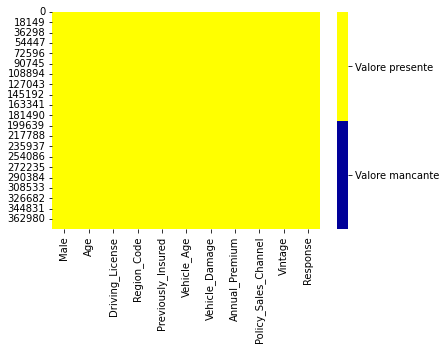

In [45]:
# HEATMAP DEI VALORI MANCANTI
cols = df.columns[:12]  # first 30 columns
colours = ['#000099', '#ffff00']  # specify the colours - yellow is missing. blue is not missing.
ax = sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-0.05, 0.05])
colorbar.set_ticklabels(['Valore mancante', 'Valore presente'])
plt.show()

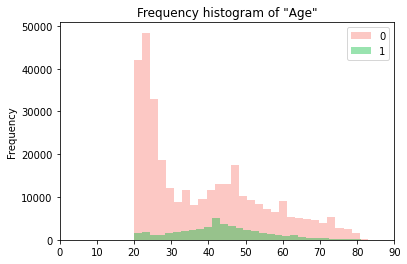

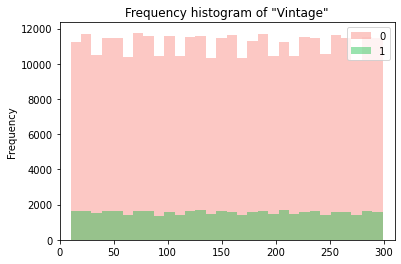

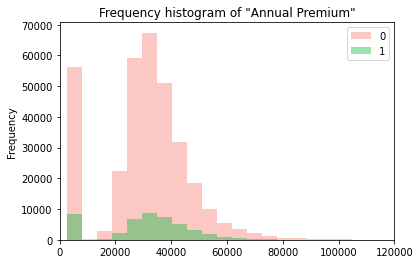

In [46]:
# DISTRIBUZIONE DELLE FREQUENZE SU VARIABILI VARIE

#DISTRIBUZIONE SU "AGE"
kwargs = dict(alpha=0.4, bins=30) #TRASPARENZA E BINNING

x1 = df.loc[df.Response == 1, 'Age']
x2 = df.loc[df.Response == 0, 'Age']
plt.hist(x2, **kwargs, color='#F8766D', label='0')
plt.hist(x1, **kwargs, color='#00BA38', label='1')
plt.gca().set(title='Frequency histogram of "Age"', ylabel='Frequency')
plt.xlim(0, 90)
plt.legend()
plt.show()

#DISTRIBUZIONE SU "VINTAGE"
x1 = df.loc[df.Response == 1, 'Vintage']
x2 = df.loc[df.Response == 0, 'Vintage']
plt.hist(x2, **kwargs, color='#F8766D', label='0')
plt.hist(x1, **kwargs, color='#00BA38', label='1')
plt.gca().set(title='Frequency histogram of "Vintage"', ylabel='Frequency')
plt.xlim(0, 310)
plt.legend();
plt.show()

#DISTRIBUZIONE SU "ANNUAL_PREMIUM"
kwargs = dict(alpha=0.4, bins=100)

x1 = df.loc[df.Response == 1, 'Annual_Premium']
x2 = df.loc[df.Response == 0, 'Annual_Premium']
plt.hist(x2, **kwargs, color='#F8766D', label='0')
plt.hist(x1, **kwargs, color='#00BA38', label='1')
plt.gca().set(title='Frequency histogram of "Annual Premium"', ylabel='Frequency')
plt.xlim(0, 120000)
plt.legend()
plt.show()


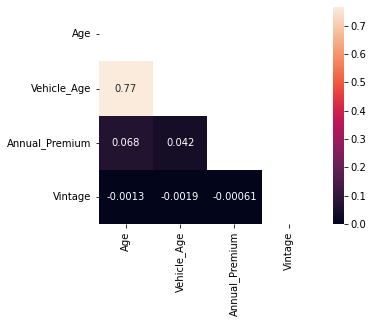

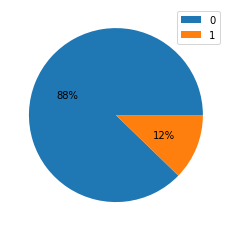

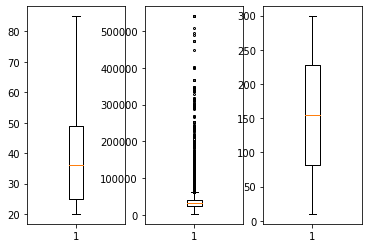

In [47]:
#MATRICE DI CORRELAZIONE
import numpy as np #PER TRIANGOLIZZAZIONE MATRICE DI CORRELAZIONE
corMatrix = df[['Age', 'Vehicle_Age', 'Annual_Premium', 'Vintage']].corr()
Matrix = np.triu(corMatrix)
sns.heatmap(corMatrix, annot=True, square=True, mask = Matrix)
plt.show()

#GRAFICO A TORTA CME DIMOSTRAZIONE DELLO SBILANCIAMENTO
freq = df['Response'].value_counts(normalize=True) * 100
plt.pie(freq, autopct='%.0f%%')
plt.legend(['0', '1'])
plt.show()

#BOXPLOT DI AGE, ANNUAL_PREMIUM E VINTAGE
plt.subplot(1, 3, 1)
plt.boxplot(df[['Age']], flierprops={'marker': 'o', 'markersize': 2})
plt.subplot(1, 3, 2)
plt.boxplot(df[['Annual_Premium']], flierprops={'markersize': 2})
plt.subplot(1, 3, 3)
plt.boxplot(df[['Vintage']], flierprops={'markersize': 2})
plt.show()

In [48]:
#SPLIT STRATIFICATO TEST/TRAIN
import sklearn as skl

y = df['Response']
x = df.drop(['Response'], axis=1)
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(x, y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=1)

In [49]:
#FUNZIONE PER GENERAZIONE DI MATRICE DI CONFUSIONE E RESTITUZIONE DI PARAMETRI
#INTERESSANTI
def confusionMatrix (Prediction, Ground_Truth, verbose = False):
    from sklearn.metrics import confusion_matrix as cm
    CM = cm(Ground_Truth, Prediction)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    accuracy = (TP+TN)/(TP + TN + FP + TN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    if (verbose):
        print("Accuracy:      %f\n" %(accuracy))
        print("Sensitivity:   %f\n" %(sensitivity))
        print("Specificity:   %f\n" %(specificity))
    return (accuracy, sensitivity, specificity)

In [50]:
#FUNZIONE PER LA CREAZIONE E IL TESTING DI ALBERI
def tree_test(X_train, y_train, X_test, y_test):
    import sklearn.tree
    dtree = skl.tree.DecisionTreeClassifier(random_state=1)
    dtree = dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    confusionMatrix(pred, y_test, verbose=True)

In [51]:
#CREZIONE DI DATASET SENZA VARIABILI CATEGORICHE (PER ALBERO)
X_train_num = X_train.drop(['Region_Code','Policy_Sales_Channel'], axis=1)
X_test_num = X_test.drop(['Region_Code', 'Policy_Sales_Channel'], axis=1)
dtree = skl.tree.DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(X_train_num, y_train)
pred = dtree.predict(X_test_num)
confusionMatrix(pred, y_test, verbose=True)

(0.48409127141262925, 0.2863769357025619, 0.8983253588516746)

In [ ]:
#VOGLIAMO VISUALIZZARE L'IMPATTO DELLA PROFONDITA' E DEL CRITERIO DI SPLIT
# SULLA QUALITA DELL'ALBERO
max = dtree.get_depth()
max_depth = []
acc_gini = []
acc_entropy = []
sens_gini = []
spec_gini = []
sens_entropy = []
spec_entropy = []
for i in range(1,max):
 dtree = skl.tree.DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=1)
 dtree.fit(X_train_num, y_train)
 pred = dtree.predict(X_test_num)
 acc_gini.append(confusionMatrix(pred, y_test)[0])
 sens_gini.append(confusionMatrix(pred, y_test)[1])
 spec_gini.append(confusionMatrix(pred, y_test)[2])
 ####
 dtree = skl.tree.DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=1)
 dtree.fit(X_train_num, y_train)
 pred = dtree.predict(X_test_num)
 acc_entropy.append(confusionMatrix(pred, y_test)[0])
 sens_entropy.append(confusionMatrix(pred, y_test)[1])
 spec_entropy.append(confusionMatrix(pred, y_test)[2])
 ####
 max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
                  'sens_gini': pd.Series(sens_gini),
                  'spec_gini': pd.Series(spec_gini),
                  'acc_entropy':pd.Series(acc_entropy),
                  'sens_entropy':pd.Series(sens_entropy),
                  'spec_entropy':pd.Series(spec_entropy),
                  'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot('max_depth','sens_gini', data=d, label='gini')
plt.plot('max_depth','sens_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('sensitivity')
plt.legend()
plt.show()

plt.plot('max_depth','spec_gini', data=d, label='gini')
plt.plot('max_depth','spec_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('specificity')
plt.legend()
plt.show()

In [ ]:
#RIBILANCIAMENTO CON UNDERSAMPLING CASUALE
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

#RIBILANCIAMENTO CON SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

# SMOTE + RANDOM UNDERSAMPLING
#The original paper on SMOTE suggested combining SMOTE
# with random undersampling of the majority class.
oversample = SMOTE(sampling_strategy=0.3) #porto lo sbilanicamento al 30%
under = RandomUnderSampler(sampling_strategy=0.7)
X_train_mix, y_train_mix = oversample.fit_resample(X_train, y_train)
X_train_mix, y_train_mix = under.fit_resample(X_train_mix, y_train_mix)

In [ ]:
#ALTRI ALBERI (CON DATASET VARI)

#ALBERO CON UNDERSAMPLING CASUALE
X_train_under_num = X_train_under.drop(['Region_Code','Policy_Sales_Channel'], axis=1)
tree_test(X_train_under_num, y_train_under, X_test_num, y_test)

In [ ]:
#ALBERO CON SMOTE
X_train_over_num = X_train_over.drop(['Region_Code','Policy_Sales_Channel'], axis=1)
tree_test(X_train_over_num, y_train_over, X_test_num, y_test)

In [ ]:
#ARBERO CON SMOTE + UNDERSAMPLING RANDOM
X_train_mix_num = X_train_mix.drop(['Region_Code','Policy_Sales_Channel'], axis=1)
tree_test(X_train_mix_num, y_train_mix, X_test_num, y_test)
